In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#Hay 60000 imagenes con una resolución de 28 x 28
train_images.shape

(60000, 28, 28)

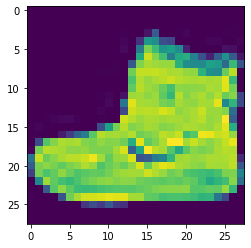

In [4]:
plt.imshow(train_images[0])

## Liempieza de datos

In [5]:
#Se mapea los de un byte a valores de 0 a 1 en coma flotante
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Modelo de datos

In [8]:
model = tf.keras.Sequential()
#Capa de entrada
model.add(Conv2D(filters=64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3)) ## Dropout para reducir overfitting
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

2022-04-18 11:56:03.452458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

2022-04-18 11:56:03.554704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:56:03.555459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 11:56:03.557096: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 11:56:03.557410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

## Compilar y entrenar

In [9]:
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [10]:
model.fit(train_images, train_labels, batch_size = 64, epochs = 10)

2022-04-18 11:56:06.308171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-18 11:56:07.810845: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


938/938 [==============================] - 11s 4ms/step - loss: 0.5708 - accuracy: 0.7906
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3872 - accuracy: 0.8625
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3478 - accuracy: 0.8762
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3299 - accuracy: 0.8829
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3217 - accuracy: 0.8856
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3174 - accuracy: 0.8878
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3140 - accuracy: 0.8896
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3134 - accuracy: 0.8903
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3153 - accuracy: 0.8897
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3165 - accuracy: 0.8888


In [11]:
model.evaluate(test_images, test_labels, verbose = 0)

[0.30162110924720764, 0.900600016117096]